Here I'll show how to tell mview.mpse_tsne to compute and retrieve separation error in the case of cluster-type data (including mnist).

In [1]:
import sys
sys.path.insert(0,"../")
import mview
import numpy as np

For datasets with only two distinct labels, the error function is the proportion of mistakes made when classifying the data using a linear separator.

For example, for points in 2D separated in a cluster, we get 0 error:

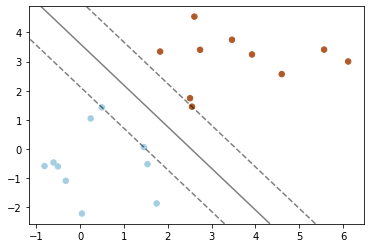

0.0

In [2]:
coordinates = np.concatenate((np.random.randn(10,2),3+np.random.randn(10,2)))
labels = np.concatenate((np.zeros(10,dtype=int),np.ones(10,dtype=int)))
mview.evaluate.separation_error(coordinates,labels,show_plot=True)

If the clusters cant be separated, we get the proportion of errors.

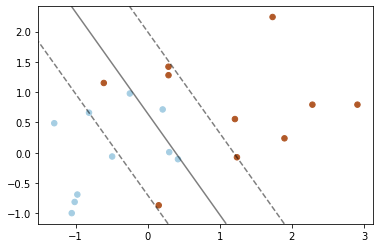

0.14999999999999997

In [3]:
coordinates = np.concatenate((np.random.randn(10,2),1+np.random.randn(10,2)))
labels = np.concatenate((np.zeros(10,dtype=int),np.ones(10,dtype=int)))
mview.evaluate.separation_error(coordinates,labels,show_plot=True)

This works in higher dimensions too (but we can't get any plots).

In [4]:
coordinates = np.concatenate((np.random.randn(10,3),1+np.random.randn(10,3)))
labels = np.concatenate((np.zeros(10,dtype=int),np.ones(10,dtype=int)))
mview.evaluate.separation_error(coordinates,labels)

0.10000000000000002

If there is more than 2 clusters, the function will compute the separation error for each pair of distinct clusters and return the average error. 

Here we run compute the separation error for 3 clusters. To do this, the labels must be a list with values 0, 1, and 2 (in general, the classes have to be of the form 0,1,...,n_clusters-1, and each class should have a few elements). The plots here each show one of the pair of clusters; the third cluster is ommited and the colors just distinguish one cluster from the other.

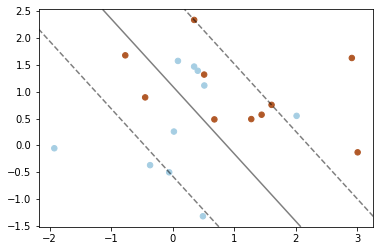

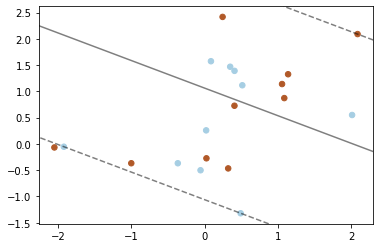

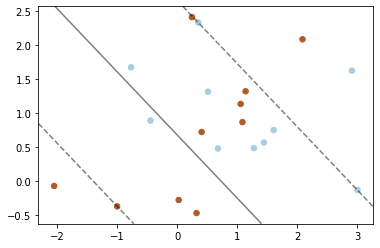

0.4000000000000001

In [5]:
coordinates = np.concatenate((np.random.randn(10,2),1+np.random.randn(10,2),1+np.random.randn(10,2)))
labels = np.concatenate((np.zeros(10,dtype=int),np.ones(10,dtype=int),2*np.ones(10,dtype=int)))
mview.evaluate.separation_error(coordinates,labels,show_plot=True)

When running experiments, it is not necessary to run this function separately from mview.mpse_tsne. To ask mview.mpse_tsne to evaluate the final solution, just pass the variable 'evaluate=True'. If the mview.MPSE object has all the correct information (such as for the sample datasets that have classes assigned to them, such as 'cluster' and 'mnist'), the separation error will be computed and stored.

In this test, the data is divided in two clusters in each of two perspective. The labels are then different for each perspective, and there is therefore a separation error for each perspective, which is stored as a list called 'image_separation'.

***mview.mpse_tsne()***
  mview.MPSE():
    data details:
      number of perspectives : 2
      number of samples : 300
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.33e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.32e+00
    initialize:
      fixed embedding : False
      initial embedding : random
      fixed projections : False
      initial projections : random
    MPSE

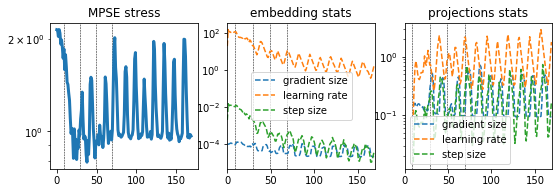

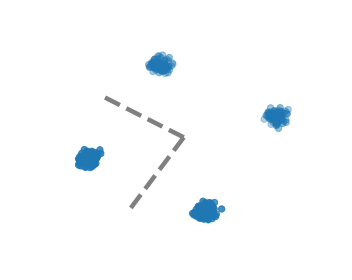

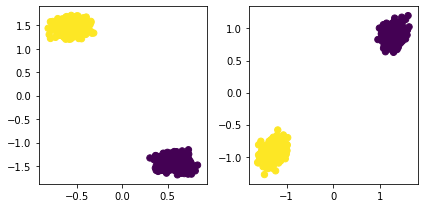

The separation error in the first perspective is 0.0
The separation error in the first perspective is 0.0


In [6]:
results = mview.mpse_tsne('clusters', n_samples=300, n_clusters=2, n_perspectives=2, perplexity=100,
                            evaluate=True, show_plots=True, verbose=2)
error1, error2 = results.image_separation
print('The separation error in the first perspective is',error1)
print('The separation error in the first perspective is',error2)

The same experiment, but with 4 perspectives, looks as follows:

***mview.mpse_tsne()***
  mview.MPSE():
    data details:
      number of perspectives : 4
      number of samples : 300
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.34e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.34e+00
  setup visualization instance for perspective 3 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:


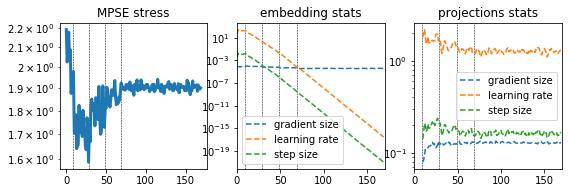

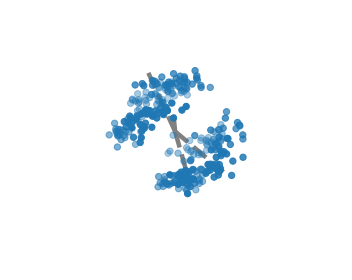

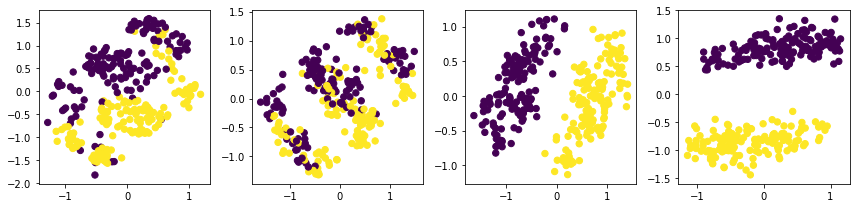

The separation errors are [0.09, 0.3233333333333333, 0.0, 0.0]


In [7]:
results = mview.mpse_tsne('clusters', n_samples=300, n_clusters=2, n_perspectives=4, perplexity=100,
                           evaluate=True, show_plots=True, verbose=2)
print('The separation errors are',results.image_separation)

More generally, for more than two clusters, the function evaluate.separation_error will find the best dividing plane for each pair of classes and average the result.

Here, we run the result for 2 and 3 clusters (in two perspectives). The output is still the same (a single number measuring the average error for the image), but note that we now have more plots for the 2nd perspective.

***mview.mpse_tsne()***
  mview.MPSE():
    data details:
      number of perspectives : 2
      number of samples : 300
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 30.00
        TSNE.initialize():
          method : random
          initial cost : 4.70e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 30.00
        TSNE.initialize():
          method : random
          initial cost : 4.74e+00
    initialize:
      fixed embedding : False
      initial embedding : random
      fixed projections : False
      initial projections : random
    MPSE.g

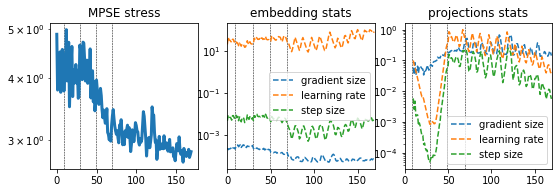

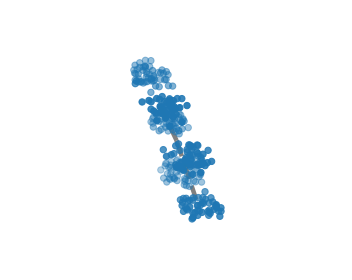

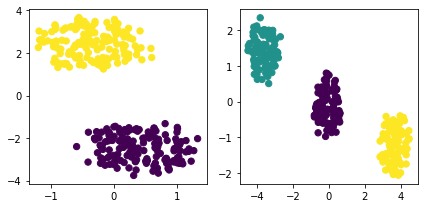

The separation errors are [0.0, 0.0]


In [2]:
results = mview.mpse_tsne('clusters', n_samples=300, n_clusters=[2,3], perplexity=30,
                          evaluate=True, show_plots=True, verbose=2)
print('The separation errors are',results.image_separation)

We can also just set n_clusters to a specific value and declare the number of perspectives.

***mview.mpse_tsne()***
  mview.MPSE():
    data details:
      number of perspectives : 3
      number of samples : 300
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.33e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.33e+00
  setup visualization instance for perspective 3 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:


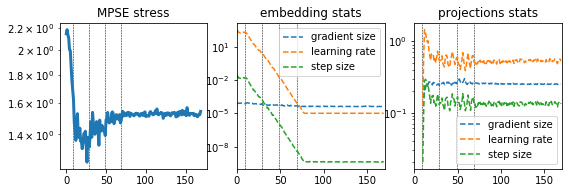

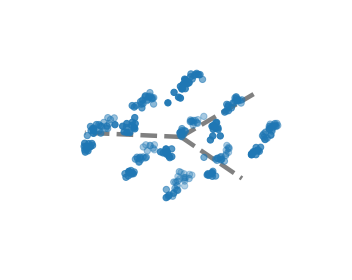

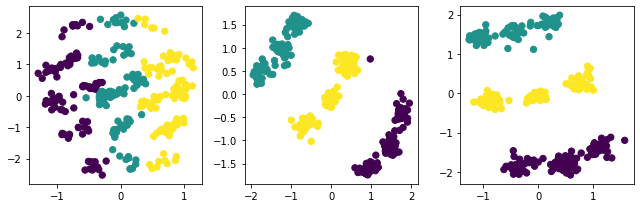

The separation errors are [0.023333333333333334, 0.0016666666666666668, 0.0]


In [6]:
results = mview.mpse_tsne('clusters', n_samples=300, n_clusters=3, n_perspectives=3, perplexity=100,
                          evaluate=True, show_plots=True, verbose=2)
print('The separation errors are',results.image_separation)

If you would like to have the individual error for each pair of clusters in the image, set the keyword argument return_individual_errors to True. The individual errors are organized in the usual order, i.e. (0,1),(0,2),(1,2) for 3 classes. Make sure the labels are numbers 0 to n_classes-1 and that each class has at least a few members.

In [ ]:
for i in range(results.n_perspectives):
    Y = results.images[i]
    labels = results.image_classes[i]
    error = mview.evaluate.separation_error(Y,labels,return_individual_errors=True)
    print('the errors in the',i,'-th view are:',error)

In [4]:
def exp1(filename, n_perspectives=2 ):
        start=20
        end=200
        step=20
        repeat=5
        n_clusters=2
        final_results=[]
        for n_sample in range( start, end, step):
            for i in range (repeat):
                results = mview.mpse_tsne('clusters', n_samples=n_sample, n_clusters=n_clusters, n_perspectives=n_perspectives, perplexity=int(n_sample * 0.6),
                                            show_plots=False, verbose=0)
                e=0#self.get_error(results)
                final_results.append([n_sample,i,n_perspectives,n_clusters,e, results.time ])
                print(final_results[-1])

In [5]:
exp1('clusters')

[20, 0, 2, 2, 0, 0.42373180389404297]
[20, 1, 2, 2, 0, 0.4802553653717041]
[20, 2, 2, 2, 0, 0.34913206100463867]
[20, 3, 2, 2, 0, 0.33864593505859375]
[20, 4, 2, 2, 0, 0.3391561508178711]
[40, 0, 2, 2, 0, 0.558058500289917]
[40, 1, 2, 2, 0, 0.7089133262634277]
[40, 2, 2, 2, 0, 0.6192140579223633]
[40, 3, 2, 2, 0, 0.6826610565185547]
[40, 4, 2, 2, 0, 0.6832180023193359]
[60, 0, 2, 2, 0, 0.7598071098327637]
[60, 1, 2, 2, 0, 0.7617058753967285]
[60, 2, 2, 2, 0, 0.7507455348968506]
[60, 3, 2, 2, 0, 0.9792764186859131]
[60, 4, 2, 2, 0, 0.9556305408477783]
[80, 0, 2, 2, 0, 1.1066458225250244]
[80, 1, 2, 2, 0, 1.0304572582244873]
[80, 2, 2, 2, 0, 1.312342882156372]
[80, 3, 2, 2, 0, 1.0878329277038574]
[80, 4, 2, 2, 0, 1.0976831912994385]
[100, 0, 2, 2, 0, 1.3925442695617676]
[100, 1, 2, 2, 0, 1.8228561878204346]
[100, 2, 2, 2, 0, 1.47945237159729]
[100, 3, 2, 2, 0, 1.500307559967041]
[100, 4, 2, 2, 0, 1.4834494590759277]
[120, 0, 2, 2, 0, 1.9518637657165527]
[120, 1, 2, 2, 0, 2.02223157882690

In [7]:
def exp2(filename, n_perspectives=2 ):
        start=20
        end=200
        step=20
        repeat=5
        n_clusters=2
        final_results=[]
        for n_sample in range( start, end, step):
            for i in range (repeat):
                results = mview.mpse_tsne('clusters', n_samples=n_sample, n_clusters=n_clusters, n_perspectives=n_perspectives, perplexity=int(n_sample * 0.6),
                                            show_plots=False, evaluate=True, verbose=0)
                e=results.image_separation
                final_results.append([n_sample,i,n_perspectives,n_clusters,e, results.time ])
                print(final_results[-1])

In [ ]:
exp2('clusters')

[20, 0, 2, 2, [0.0, 0.0], 0.350435733795166]
[20, 1, 2, 2, [0.0, 0.0], 0.3555276393890381]
[20, 2, 2, 2, [0.0, 0.0], 0.37486815452575684]
[20, 3, 2, 2, [0.0, 0.0], 0.34558629989624023]
[20, 4, 2, 2, [0.0, 0.0], 0.33881497383117676]
[40, 0, 2, 2, [0.0, 0.0], 0.5229265689849854]
[40, 1, 2, 2, [0.0, 0.0], 0.5240380764007568]
[40, 2, 2, 2, [0.0, 0.0], 0.5281474590301514]
[40, 3, 2, 2, [0.0, 0.0], 0.520317792892456]
[40, 4, 2, 2, [0.0, 0.0], 0.5331652164459229]
[60, 0, 2, 2, [0.5, 0.5], 0.7467095851898193]
